## Ames Housing Sale Price Prediction - Feature Selection

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('Ames_train_FE.csv')
data.shape

(1460, 84)

In [3]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.036765,0.098361,0.0,0.0,1.0,1.0,0.50,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.0,0.064212,0.140098,1.0,1.00,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.2,0.8,0.046729,0.666667,0.50,0.386460,0.666667,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.500000,0.2,1.0,0.75,0.6,0.555556,0.875,0.227941,0.524590,0.0,0.0,0.4,0.3,0.25,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.0,0.121575,0.206547,1.0,1.00,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.0,0.333333,0.6,0.8,0.289720,0.666667,0.50,0.324401,0.666667,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.636364,0.4,1.0,0.75,1.0,0.666667,0.500,0.051471,0.114754,0.0,0.0,1.0,1.0,0.50,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.0,0.185788,0.150573,1.0,1.00,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.6,0.8,0.065421,0.666667,0.50,0.428773,0.666667,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.500,0.669118,0.606557,0.0,0.0,0.2,0.4,0.25,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.0,0.231164,0.123732,1.0,0.75,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.8,0.4,0.074766,0.333333,0.75,0.452750,0.666667,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.4,1.0,0.75,1.0,0.777778,0.500,0.058824,0.147541,0.0,0.0,1.0,1.0,0.50,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.0,0.209760,0.187398,1.0,1.00,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,0.6,0.8,0.074766,0.666667,0.75,0.589563,0.666667,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0


In [4]:
features_nan = [f for f in data.columns if '_nan' in f]
features_nan

['LotFrontage_nan', 'MasVnrArea_nan', 'GarageYrBlt_nan']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'] + features_nan, axis=1), data['SalePrice'],
                                                       test_size=0.2, random_state=1)
X_train.shape, X_test.shape

((1168, 79), (292, 79))

## Hybrid method: Recursive feature addition

This method consists of the following steps:

1) Rank the features according to their importance derived from a machine learning algorithm: it can be tree importance, or LASSO / Ridge, or the linear / logistic regression coefficients.

2) Build a machine learning model with only 1 feature, the most important one, and calculate the model metric for performance.

3) Add one feature -the most important- and build a machine learning algorithm utilising the added and any feature from previous rounds.

4) Calculate a performance metric of your choice: roc-auc, mse, rmse, accuracy.

5) If the metric increases by more than an arbitrarily set threshold, then that feature is important and should be kept. Otherwise, we can remove that feature.

6) Repeat steps 2-5 until all features have been removed (and therefore evaluated) and the drop in performance assessed.


I call this a hybrid method because:

- it combines the importance derived from the machine learning algorithm like embedded methods,
- and it adds as well one feature at a time, and calculates a new metric based on the new subset of features and the machine learning algorithm of choice, like wrapper methods.

The difference between this method and the step forward feature selection we learned in previous lectures lies in that it does not add all possible features first, in order to determine which one to keep. It adds the most important one, based on the machine learning model derived important. And then, it makes an assessment as to whether that feature should be kept or not. And then it moves to the next feature.

This method is therefore faster than wrapper methods and generally better than embedded methods. In practice it works extremely well. It does also account for correlations (depending on how stringent you set the arbitrary performance drop threshold). On the downside, the increase in performance assessed to decide whether the feature should be kept or removed, is set arbitrarily. The smaller the increase the more features will be selected, and vice versa.

I will demonstrate how to select features using this method on a regression and classification problem. For classification I will use the Paribas claims dataset from Kaggle. For regression, the House Price dataset from Kaggle.

**Note** For the demonstration, I will use XGBoost, but this method is useful for any machine learning algorithm. In fact, the importance of the features are determined specifically for the algorithm used. Therefore, different algorithms may return different subsets of important features.


In [6]:
#lets build Xgboost model to get the feature importance
import xgboost as xgb
from sklearn.metrics import r2_score

model_all = xgb.XGBRegressor(n_thread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
model_all.fit(X_train, y_train)

[13:15:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
             n_jobs=1, n_thread=10, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [7]:
model_all_pred = model_all.predict(X_test)
r2_all = r2_score(y_test, model_all_pred)
print('The r2 score with all parameters: %f' %r2_all)
r2_base = r2_all

The r2 score with all parameters: 0.908641


In [8]:
#lets plot the feature importances
type(model_all.feature_importances_)

numpy.ndarray

In [9]:
features = pd.Series(model_all.feature_importances_)
features.index = X_train.columns
features

MSSubClass       0.000506
MSZoning         0.002843
LotFrontage      0.001533
LotArea          0.005895
Street           0.000000
Alley            0.001405
LotShape         0.001553
LandContour      0.001986
Utilities        0.000000
LotConfig        0.001449
LandSlope        0.001742
Neighborhood     0.030133
Condition1       0.002873
Condition2       0.000764
BldgType         0.008707
HouseStyle       0.001908
OverallQual      0.039284
OverallCond      0.007840
YearBuilt        0.002390
YearRemodAdd     0.014323
RoofStyle        0.001143
RoofMatl         0.001700
Exterior1st      0.001091
Exterior2nd      0.001380
MasVnrType       0.001242
MasVnrArea       0.001115
ExterQual        0.008028
ExterCond        0.005993
Foundation       0.001066
BsmtQual         0.020887
                   ...   
HalfBath         0.002705
BedroomAbvGr     0.001593
KitchenAbvGr     0.002686
KitchenQual      0.086751
TotRmsAbvGrd     0.002003
Functional       0.004142
Fireplaces       0.003630
FireplaceQu 

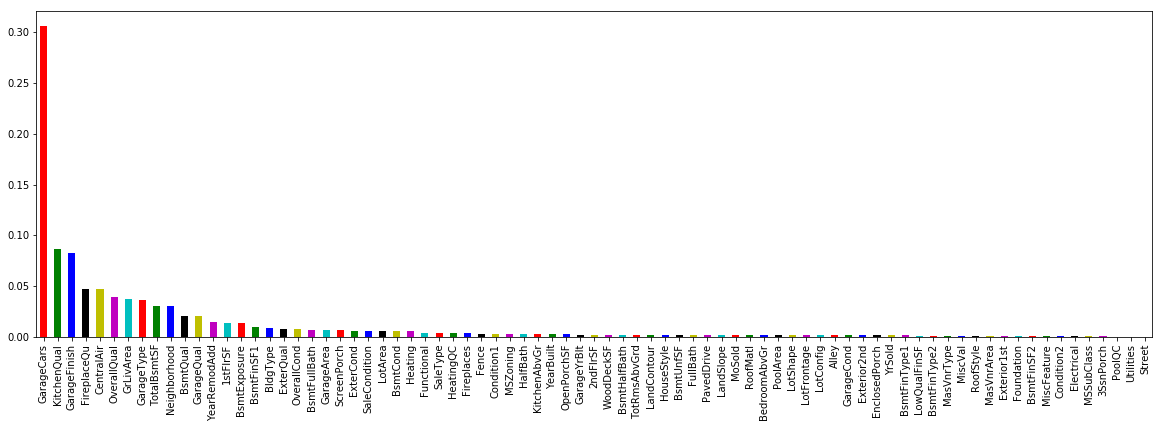

In [10]:
features.sort_values(inplace=True, ascending=False)
features.plot.bar(figsize=(20,6), color=list('rgbkymc'))

In [11]:
# Garage cars capacity is the most important feature. 
# lets build a model with only that feature and then increasingly add features that would improve the r2 by atleast 0.01

model1f = xgb.XGBRegressor(n_thread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
model1f.fit(X_train[features.index[0]].to_frame(), y_train)

model1f_pred = model1f.predict(X_test[features.index[0]].to_frame())
model1f_r2 = r2_score(y_test, model1f_pred)
print('The r2 score for 1 most imp feature is: %f' %model1f_r2)

[13:15:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The r2 score for 1 most imp feature is: 0.496242


In [12]:
model1f_r2

0.4962420987164853

In [13]:
features = list(features.index)
features

['GarageCars',
 'KitchenQual',
 'GarageFinish',
 'FireplaceQu',
 'CentralAir',
 'OverallQual',
 'GrLivArea',
 'GarageType',
 'TotalBsmtSF',
 'Neighborhood',
 'BsmtQual',
 'GarageQual',
 'YearRemodAdd',
 '1stFlrSF',
 'BsmtExposure',
 'BsmtFinSF1',
 'BldgType',
 'ExterQual',
 'OverallCond',
 'BsmtFullBath',
 'GarageArea',
 'ScreenPorch',
 'ExterCond',
 'SaleCondition',
 'LotArea',
 'BsmtCond',
 'Heating',
 'Functional',
 'SaleType',
 'HeatingQC',
 'Fireplaces',
 'Fence',
 'Condition1',
 'MSZoning',
 'HalfBath',
 'KitchenAbvGr',
 'YearBuilt',
 'OpenPorchSF',
 'GarageYrBlt',
 '2ndFlrSF',
 'WoodDeckSF',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 'LandContour',
 'HouseStyle',
 'BsmtUnfSF',
 'FullBath',
 'PavedDrive',
 'LandSlope',
 'MoSold',
 'RoofMatl',
 'BedroomAbvGr',
 'PoolArea',
 'LotShape',
 'LotFrontage',
 'LotConfig',
 'Alley',
 'GarageCond',
 'Exterior2nd',
 'EnclosedPorch',
 'YrSold',
 'BsmtFinType1',
 'LowQualFinSF',
 'BsmtFinType2',
 'MasVnrType',
 'MiscVal',
 'RoofStyle',
 'MasVnrArea',

In [16]:
features_to_keep = [features[0]]

count = 1

ref_r2 = model1f_r2

for feature in features[1:]:
    
    count += 1
    print('Testing Feature: \'%s\' which is %d of %d' %(feature, count, len(features)))
    
    model = xgb.XGBRegressor(n_thread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
    model.fit(X_train[features_to_keep + [feature]], y_train)
    
    model_pred = model.predict(X_test[features_to_keep + [feature]])
    model_r2 = r2_score(y_test, model_pred)
    
    print('Model r2 score: %f compared to previous r2 score: %f' %(model_r2, ref_r2))
    
    r2_diff = model_r2 - ref_r2
    print('Improvement in r2 score: %f' %r2_diff)
    
    if r2_diff > 0.0075:
        print('Retain: ', feature)
        features_to_keep.append(feature)
        ref_r2 = model_r2
    else:
        print('Drop: ', feature)
    
    print('-' * 125)
        
print('\nTotal features shorlisted are: ', len(features_to_keep))
print(features_to_keep)

        

Testing Feature: 'KitchenQual' which is 2 of 79
[13:19:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.624921 compared to previous r2 score: 0.496242
Improvement in r2 score: 0.128679
Retain:  KitchenQual
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'GarageFinish' which is 3 of 79
[13:19:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.634237 compared to previous r2 score: 0.624921
Improvement in r2 score: 0.009316
Retain:  GarageFinish
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'FireplaceQu' which is 4 of 79
[13:19:04] WARNING: C:/Jenkins/wor

Model r2 score: 0.893572 compared to previous r2 score: 0.893650
Improvement in r2 score: -0.000078
Drop:  BsmtFullBath
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'GarageArea' which is 21 of 79
[13:19:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.894793 compared to previous r2 score: 0.893650
Improvement in r2 score: 0.001143
Drop:  GarageArea
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'ScreenPorch' which is 22 of 79
[13:19:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.897424 compared to previous r2 score: 0.893650
Improvement in r2 sco

Model r2 score: 0.900499 compared to previous r2 score: 0.902983
Improvement in r2 score: -0.002484
Drop:  GarageYrBlt
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: '2ndFlrSF' which is 40 of 79
[13:19:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.904409 compared to previous r2 score: 0.902983
Improvement in r2 score: 0.001426
Drop:  2ndFlrSF
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'WoodDeckSF' which is 41 of 79
[13:19:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.904340 compared to previous r2 score: 0.902983
Improvement in r2 score: 0.

Model r2 score: 0.902420 compared to previous r2 score: 0.902983
Improvement in r2 score: -0.000564
Drop:  GarageCond
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'Exterior2nd' which is 59 of 79
[13:20:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.905199 compared to previous r2 score: 0.902983
Improvement in r2 score: 0.002216
Drop:  Exterior2nd
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'EnclosedPorch' which is 60 of 79
[13:20:13] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.904474 compared to previous r2 score: 0.902983
Improvement in r2 s

Model r2 score: 0.904039 compared to previous r2 score: 0.902983
Improvement in r2 score: 0.001056
Drop:  3SsnPorch
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'PoolQC' which is 77 of 79
[13:20:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.905588 compared to previous r2 score: 0.902983
Improvement in r2 score: 0.002605
Drop:  PoolQC
-----------------------------------------------------------------------------------------------------------------------------
Testing Feature: 'Utilities' which is 78 of 79
[13:20:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.904816 compared to previous r2 score: 0.902983
Improvement in r2 score: 0.001833
D

In [17]:
#lets build a model with the shorlited (12) features and compare r2

model_fs = xgb.XGBRegressor(n_thread=10, max_depth=4, n_estimators=500, learning_rate=0.05)
model_fs.fit(X_train[features_to_keep], y_train)

model_fs_pred = model_fs.predict(X_test[features_to_keep])
model_fs_r2 = r2_score(model_fs_pred, y_test)

print('Model r2 score: %f agains all feature r2 score: %f' %(model_fs_r2,r2_all))

[13:20:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model r2 score: 0.890745 agains all feature r2 score: 0.908641


- 79 Features R2: 0.91
- Threshold 0.01 selects 12 features and gives R2: 0.887
- <b>Threshold 0.0075 selects only 12 features and gives R2: 0.891</b>
- Threshold 0.009 selects 17 features that give a R2: 0.890


In [18]:
X1 = pd.concat([y_train, X_train[features_to_keep]], axis=1)
X2 = pd.concat([y_test, X_test[features_to_keep]], axis=1)
X_fs3 = pd.concat([X1, X2], axis=0)
X_fs3.shape

(1460, 13)

In [19]:
X_fs3.head()

,SalePrice,GarageCars,KitchenQual,GarageFinish,FireplaceQu,CentralAir,OverallQual,GrLivArea,TotalBsmtSF,Neighborhood,BsmtFinSF1,OverallCond,YearBuilt
921,11.890677,0.0,0.333333,0.0,0.2,1.0,0.444444,0.666845,0.208183,0.227273,0.192062,0.750,0.794118
520,11.573550,0.0,0.333333,0.0,0.2,0.0,0.333333,0.479103,0.000000,0.181818,0.000000,0.750,0.794118
401,12.013640,0.5,0.666667,1.0,0.8,1.0,0.666667,0.483450,0.214403,0.636364,0.004252,0.500,0.007353
280,12.339291,0.5,0.666667,1.0,0.6,1.0,0.666667,0.629930,0.132079,0.454545,0.074592,0.625,0.132353
1401,12.170445,0.5,0.333333,1.0,0.6,1.0,0.555556,0.552640,0.137316,0.590909,0.134479,0.500,0.029412


In [20]:
X_fs3.to_csv('Ames_train_FS3.csv', index=False)